# Disney+ Movies and TV Shows Analysis

Disney+ is one of the most popular media and video streaming platforms.This tabular dataset consists of listings of all the movies and tv shows available on Disney+, along with details such as - cast, directors, ratings, release year, duration, etc.Dataset link: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows. I will try to analyse this dataset and try to answer interesting questions like :'Is there any relationship between the duration of the movies/TV shows and the year of release?','Top countries that produce content for Disney+' etc.I will be using pandas, matplotlib, seaborn libraries learned in the Jovian course-[Data Analysis with Python: Zero to Pandas](zerotopandas.com) for this analysis.

## Downloading the Dataset

Downloaded the dataset from kaggle and used open dataset library.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
#Dataset url from kaggle
dataset_url = 'https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows' 

In [3]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows')

Skipping, found downloaded files in ".\disney-movies-and-tv-shows" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './disney-movies-and-tv-shows'

In [5]:
import os
os.listdir(data_dir)

['disney_plus_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "disney-plus-movies-and-tv-shows"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'

## Data Preparation and Cleaning
The dataset is downloaded.Now will convert it to dataframe using pandas.Review the dataset rows and columns. Check for missing and null values and treat them.


In [10]:
import pandas as pd

In [11]:
disney_raw_df = pd.read_csv(data_dir + "/disney_plus_titles.csv")

In [12]:
disney_raw_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [13]:
# count total rows and columns
disney_raw_df.shape

(1450, 12)

In [14]:
# .shape method gives us that the dataframe has 1450 rows and 12 columns

In [15]:
disney_raw_df.info()
# This basically counts non-null values for the columns and also mentions datatype. 
# Here we can observe that only 'release_year' has integer(numeric) datatype and rest all are object (string) datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [16]:
disney_raw_df.describe()
# gives the count, mean and other statistical information about the int datatype.

,release_year
count,1450.000000
mean,2003.091724
std,21.860162
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [17]:
disney_raw_df.isna().values.any()
#we are checking if there are any null values in the entire dataframe. 'True' states that there are null values.

True

In [18]:
disney_raw_df.isna().sum()
#This gives the sum of null values in the specific columns of the dataframe

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [19]:
# converting object datatype to datetime datatype for column 'date_added
disney_raw_df['date_added'] =  pd.to_datetime(disney_raw_df['date_added'])

In [20]:
disney_raw_df.head(2)
#checking if the col ''date_added' is converted to datetime datatype

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...


In [21]:
disney_raw_df.info()
#checking if the col ''date_added' is converted to datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1450 non-null   object        
 1   type          1450 non-null   object        
 2   title         1450 non-null   object        
 3   director      977 non-null    object        
 4   cast          1260 non-null   object        
 5   country       1231 non-null   object        
 6   date_added    1447 non-null   datetime64[ns]
 7   release_year  1450 non-null   int64         
 8   rating        1447 non-null   object        
 9   duration      1450 non-null   object        
 10  listed_in     1450 non-null   object        
 11  description   1450 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 136.1+ KB


In [22]:
disney_raw_df[disney_raw_df['rating'].isna()]
#lets check and treat the null values for considering the columns one by one starting at 'rating'

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,2021-11-25,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
276,s277,Movie,Disney My Music Story: Perfume,Kentaro Takayanagi,"a-chan , KASHIYUKA , NOCCHi",NaN,2021-03-19,2019,NaN,53 min,"Biographical, Documentary, Music",J-Pop band Perfume shares their passion for mu...
280,s281,TV Show,Marvel Studios ASSEMBLED,NaN,NaN,NaN,2021-03-12,2021,NaN,1 Season,"Anthology, Docuseries",ASSEMBLED is an immersive series of docu-speci...


In [23]:
#found ratings for the null 'Rating' column from Disney+ and imdb website.
#Now treating the null values by specific values

In [24]:
disney_raw_df.loc[4,'rating'] = 'PG-13'

In [25]:
disney_raw_df.loc[276,'rating'] = 'TV-14'

In [26]:
disney_raw_df.loc[280,'rating'] = 'TV-14'

In [27]:
disney_raw_df[disney_raw_df['rating'].isna()]
#nulls replaced by specific values

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [28]:
disney_raw_df.isna().sum()
#checking if the nulls in 'rating' column are treated

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [29]:
disney_raw_df[disney_raw_df['date_added'].isna()]
#checking null values in 'date_added' column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1439,s1440,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaT,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1440,s1441,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaT,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1441,s1442,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaT,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [30]:
# dropping rows with null values for 'date_added' col
disney_raw_df.dropna(axis=0, subset =['date_added'],inplace=True)

In [31]:
disney_raw_df.isna().sum()
#checking if the nulls in 'date_added' column are treated

show_id           0
type              0
title             0
director        470
cast            190
country         219
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [32]:
#check if null values are dropped
disney_raw_df[disney_raw_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [33]:
disney_raw_df.isna().sum()
#need to treat for 'director','cast','country' columns

show_id           0
type              0
title             0
director        470
cast            190
country         219
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [34]:
#using fillna for null values in 'director','cast','country' columns

In [35]:
disney_raw_df.fillna('Data unavailable',inplace=True)

In [36]:
disney_raw_df.isna().sum()
#check if all the null values in the dataframe are treated

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [37]:
disney_raw_df.head(5)
#check how the dataframe looks now

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Data unavailable,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Data unavailable,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Data unavailable,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,Data unavailable,"John Lennon, Paul McCartney, George Harrison, ...",Data unavailable,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [38]:
#check for duplicates
disney_raw_df.duplicated().sum()
#no duplicates

0

In [39]:
import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'

## Exploratory Analysis and Visualization

Here we try to find more information about the data using statistical measures and basic graphs to see distribution of the data and relation between different columns of the data.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [41]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Compute the mean, sum, range and other interesting statistics for numeric columns

In [42]:
disney_raw_df.describe()
# Gives the count, mean and other statistical information about the int datatype. 
# We have only one numeric column that is 'release_year'

,release_year
count,1447.000000
mean,2003.071873
std,21.877923
min,1928.000000
25%,1999.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


# Insights:
We got to know that the total count of release years is 1447. Earliest release year is 1928 and latest is 2021 from min and max.
The average release year is 2003.

# We can use a histogram to visualize how the values of release_year are distributed.

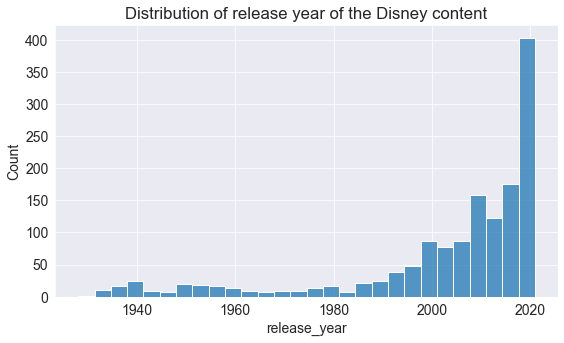

In [43]:
plt.title("Distribution of release year of the Disney content")

sns.histplot(disney_raw_df.release_year, kde=False);

# Insights:
We got to know that most of the content on Disney plus is from latest years i.e. from 2000 and above. The maximum content is from release year 2020.

# Let's draw separate histograms for each type

In [44]:
disney_raw_df['type'].unique()
#checking unique values in 'type' column

array(['Movie', 'TV Show'], dtype=object)

In [45]:
movies_df = disney_raw_df[disney_raw_df.type == 'Movie']
tv_shows_df = disney_raw_df[disney_raw_df.type == 'TV Show']
#created 2 separate dataframes for movies and TV Shows which will be useful for plotting multiple histograms.

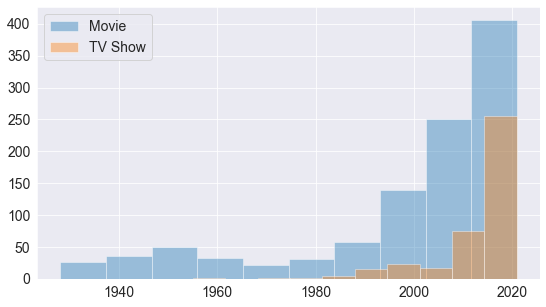

In [46]:
plt.hist(movies_df.release_year, alpha=0.4);
plt.hist(tv_shows_df.release_year, alpha=0.4);
plt.legend(['Movie', 'TV Show']);

# Insights:
We got to know that most of the distribution for the release_year for Movies and TV shows on Disney plus is from latest years.
Movies are added from before 1940 and above whereas TV shows are added from 1980 and above.

# Compute the mean, sum, range and other interesting statistics for datetime column

In [47]:
disney_raw_df['date_added'].describe(datetime_is_numeric=True)

count                             1447
mean     2020-05-22 01:54:26.620594176
min                2019-10-01 00:00:00
25%                2019-11-12 00:00:00
50%                2019-11-12 00:00:00
75%                2020-11-26 00:00:00
max                2021-11-26 00:00:00
Name: date_added, dtype: object

# Insights:
We got to know that the earliest date of adding the content is 2019-10-01 and latest is 2021-11-26 from min and max.
So the data we are working on had content added from Oct 2019 to Nov 2021.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [48]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Data unavailable,2021-11-26,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Data unavailable,2021-11-26,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Data unavailable,2021-11-26,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...


In [49]:
#Replace 'min' with blank in for values in the 'duration' column
movies_df['duration'] = movies_df['duration'].apply(lambda x :str(x).replace('min','')if 'min' in str(x) else x)

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/541775181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].apply(lambda x :str(x).replace('min','')if 'min' in str(x) else x)


In [50]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Data unavailable,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Data unavailable,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Data unavailable,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...


In [51]:
#Convert 'duration' column from object to into numeric data type
movies_df['duration'] = pd.to_numeric(movies_df['duration'])

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/2217136814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = pd.to_numeric(movies_df['duration'])


In [52]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1052 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       1052 non-null   object        
 1   type          1052 non-null   object        
 2   title         1052 non-null   object        
 3   director      1052 non-null   object        
 4   cast          1052 non-null   object        
 5   country       1052 non-null   object        
 6   date_added    1052 non-null   datetime64[ns]
 7   release_year  1052 non-null   int64         
 8   rating        1052 non-null   object        
 9   duration      1052 non-null   int64         
 10  listed_in     1052 non-null   object        
 11  description   1052 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 106.8+ KB


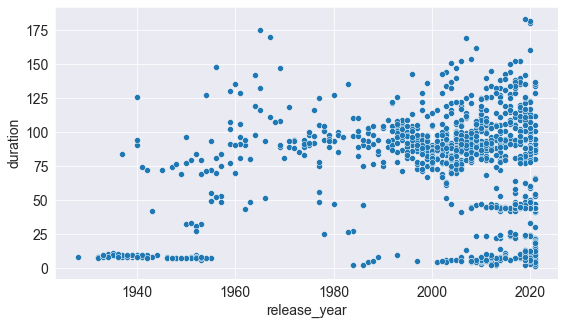

In [53]:
#check relationship between duration and release_year
sns.scatterplot(x=movies_df.release_year, y=movies_df.duration);

# Insights:
We can say that there is no correlation between release_year and the duration of the movie. We can observe that in the years around 1950 to 1985 no movies added were of lesser duration.

Let us save and upload our work to Jovian before continuing

In [54]:
import jovian

In [55]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'

## Asking and Answering Questions

Lets form some interesting questions and try to fing answers to the questions.



#### Q1: Find out which release_year has max no. of movies+tv shows.Then find out of them how many are movies and tv shows.

In [56]:
#Use groupby to group the data with'release_year' and aggregate count on type to find no. of content for each release_year 
year_count = disney_raw_df.groupby(['release_year']).agg( Count = ('type','count'))

In [57]:
#sorting values by descending order to get max no. on the top
year_count.sort_values(by='Count',ascending=False)

,Count
release_year,
2021,125
2020,114
2019,99
2017,69
2018,65
...,...
1944,1
1945,1
1968,1


In [58]:
#Year 2021 has max no. of movies+tv shows which are 125.

In [59]:
#creatinh new dataframe with data only for year 2021
disney_2021_df =disney_raw_df[disney_raw_df.release_year==2021]

In [60]:
#this gives direct result for no. of movies and TV shows for in the dataframe
disney_2021_df['type'].value_counts()

Movie      70
TV Show    55
Name: type, dtype: int64

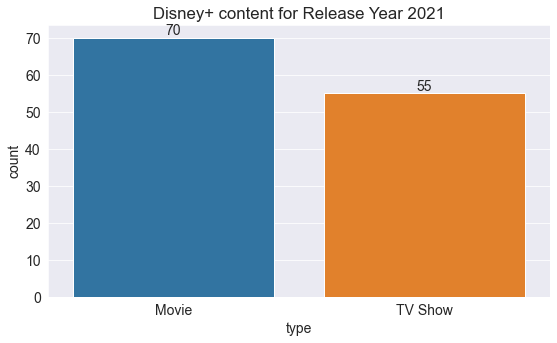

In [61]:
#plotting bar graph- countplot for counting the no. of times the value repeated itself in the dataframe.
#We have used matplotlib for title and seaborn for plotting the countplot.
plt.title('Disney+ content for Release Year 2021')

ax = sns.countplot(x=disney_2021_df['type'],
                   order=disney_2021_df['type'].value_counts(ascending=False).index);

abs_values = disney_2021_df['type'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [62]:
#Year 2021 has max no. of movies+tv shows which are 125 out of which 70 are Movies and 55 are TV Shows.

#### Q2: Classify movies into 4 buckets and plot them <30 min(Short), Between 30 and 60 mins(Medium), Between 60 and 120 mins(Normal),>120(Long) movies and draw inference.

In [63]:
movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",Data unavailable,2021-11-26,2016,TV-G,23,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Data unavailable,2021-11-26,1988,PG,91,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,2021-11-26,2011,TV-G,23,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",Data unavailable,2021-11-26,2021,TV-PG,41,Musical,"This is real life, not just fantasy!"
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,2021-11-24,2021,PG-13,94,"Biographical, Documentary",An inside look at the legendary life of advent...


In [64]:
Short = movies_df[(movies_df.duration<30)]
Medium = movies_df[(movies_df.duration>=30) & (movies_df.duration<60)]
Normal = movies_df[(movies_df.duration>=60) & (movies_df.duration<120)]
Long = movies_df[(movies_df.duration>=120)]

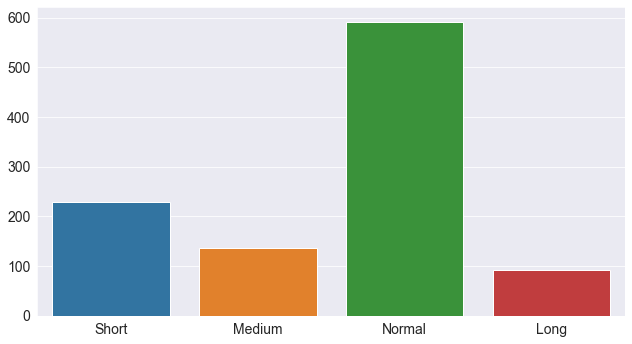

In [65]:
sns.barplot(x=['Short','Medium','Normal','Long'],y=[len(Short),len(Medium),len(Normal),len(Long)])
plt.tight_layout()

#Maximum movies uploaded are 1 to 2 hours long followed by short duration movies of less than 30 mins which are less than half of the normal duration movies uploaded. 30 to 60 mins and more than 120 minutes seems like a bit odd for the movie duration so these movies are less.

#### Q3: Extract movies listed in 'Family' genre for duration 45 to 60 mins to recommend to secondary school entertainment period. Make sure that the Rating is not 16+ and above and release year is 1990 and above.

In [66]:
#lets extract movies for the spefied dutaion of 45 to 60 mins
extracted_movies = movies_df[(movies_df.duration>=45) & (movies_df.duration<=60)]

In [67]:
#checking the genre given under listed_in column
extracted_movies['listed_in'].unique()

array(['Comedy, Family, Musical', 'Documentary', 'Comedy',
       'Animation, Family, Fantasy',
       'Action-Adventure, Animation, Science Fiction',
       'Animation, Fantasy', 'Biographical, Documentary',
       'Animals & Nature, Documentary',
       'Biographical, Documentary, Music', 'Documentary, Historical',
       'Action-Adventure, Animation, Fantasy', 'Fantasy, Variety',
       'Movies', 'Drama, Music, Romance', 'Family, Music, Variety',
       'Action-Adventure, Animation, Comedy',
       'Animals & Nature, Documentary, Survival',
       'Animals & Nature, Documentary, Family',
       'Documentary, Family, Historical', 'Coming of Age, Drama, Family',
       'Historical, Musical', 'Documentary, Family',
       'Animation, Documentary, Family', 'Drama, Family, Historical',
       'Concert Film, Music, Musical', 'Animals & Nature, Family',
       'Action-Adventure, Animation, Musical',
       'Action-Adventure, Animation, Coming of Age',
       'Documentary, Sports', 'Drama, 

In [68]:
#we need to split the strings from listed_in column to get genre in seperate rows for the movies
#The split() method splits a string into a list.
# we have specified ','(comma) as a separator
extracted_movies['listed_in'] = extracted_movies['listed_in'].str.split(',')

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/2568331056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_movies['listed_in'] = extracted_movies['listed_in'].str.split(',')


In [69]:
extracted_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,"[Comedy, Family, Musical]",Celebrate the holiday season with all your fav...
10,s11,Movie,Adventure Thru the Walt Disney Archives,John Gleim,"Don Hahn, Kathryn Beaumont, Pete Docter, Kevin...",Data unavailable,2021-11-19,2020,TV-PG,59,[Documentary],Explore the treasures and rich history of the ...
68,s69,Movie,Just Roll With It: You Decide Live!,Data unavailable,"Tobie Windham, Suzi Barrett, Ramon Reed, Kayli...",Data unavailable,2021-10-08,2019,G,52,[Comedy],The Bennett-Blatts set out to reverse an evil ...
69,s70,Movie,Mickey's Tale of Two Witches,Jeff Gordon,"Bret Iwan, Kaitlyn Robrock, Bill Farmer, Danie...",Data unavailable,2021-10-08,2021,TV-Y,47,"[Animation, Family, Fantasy]",Mickey tells a tale of two witches-in-training!
70,s71,Movie,Muppets Haunted Mansion,Kirk Thatcher,"Dave Goelz, Bill Barretta, Will Arnett, Taraji...",Data unavailable,2021-10-08,2021,TV-PG,53,"[Comedy, Family, Musical]",Gonzo is challenged to spend Halloween night i...


In [70]:
# The explode() method converts each element of the specified column(s) into a row.
out = extracted_movies.explode('listed_in')

In [71]:
out.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Comedy,Celebrate the holiday season with all your fav...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Family,Celebrate the holiday season with all your fav...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Musical,Celebrate the holiday season with all your fav...
10,s11,Movie,Adventure Thru the Walt Disney Archives,John Gleim,"Don Hahn, Kathryn Beaumont, Pete Docter, Kevin...",Data unavailable,2021-11-19,2020,TV-PG,59,Documentary,Explore the treasures and rich history of the ...
68,s69,Movie,Just Roll With It: You Decide Live!,Data unavailable,"Tobie Windham, Suzi Barrett, Ramon Reed, Kayli...",Data unavailable,2021-10-08,2019,G,52,Comedy,The Bennett-Blatts set out to reverse an evil ...


In [72]:
out['listed_in'].unique()

array(['Comedy', ' Family', ' Musical', 'Documentary', 'Animation',
       ' Fantasy', 'Action-Adventure', ' Animation', ' Science Fiction',
       'Biographical', ' Documentary', 'Animals & Nature', ' Music',
       ' Historical', 'Fantasy', ' Variety', 'Movies', 'Drama',
       ' Romance', 'Family', ' Comedy', ' Survival', 'Coming of Age',
       ' Drama', 'Historical', 'Concert Film', ' Coming of Age',
       ' Sports', ' Mystery', 'Buddy', ' Medical', ' Animals & Nature'],
      dtype=object)

In [73]:
out['listed_in'].nunique()

32

In [74]:
#lets remove the whitespaces
out['listed_in'] = out['listed_in'].str.strip()

In [75]:
#The unique() method returns the unique values for each or specified column.
out['listed_in'].unique()

array(['Comedy', 'Family', 'Musical', 'Documentary', 'Animation',
       'Fantasy', 'Action-Adventure', 'Science Fiction', 'Biographical',
       'Animals & Nature', 'Music', 'Historical', 'Variety', 'Movies',
       'Drama', 'Romance', 'Survival', 'Coming of Age', 'Concert Film',
       'Sports', 'Mystery', 'Buddy', 'Medical'], dtype=object)

In [76]:
#The nunique() method returns the number of unique values for specified or each column.
out['listed_in'].nunique()

23

In [77]:
out.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Comedy,Celebrate the holiday season with all your fav...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Family,Celebrate the holiday season with all your fav...
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Musical,Celebrate the holiday season with all your fav...
10,s11,Movie,Adventure Thru the Walt Disney Archives,John Gleim,"Don Hahn, Kathryn Beaumont, Pete Docter, Kevin...",Data unavailable,2021-11-19,2020,TV-PG,59,Documentary,Explore the treasures and rich history of the ...
68,s69,Movie,Just Roll With It: You Decide Live!,Data unavailable,"Tobie Windham, Suzi Barrett, Ramon Reed, Kayli...",Data unavailable,2021-10-08,2019,G,52,Comedy,The Bennett-Blatts set out to reverse an evil ...


In [78]:
# keeping only the movies listed_in 'Family genre
movies_for_schools = out[(out.listed_in == 'Family')]

In [79]:
movies_for_schools

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Family,Celebrate the holiday season with all your fav...
69,s70,Movie,Mickey's Tale of Two Witches,Jeff Gordon,"Bret Iwan, Kaitlyn Robrock, Bill Farmer, Danie...",Data unavailable,2021-10-08,2021,TV-Y,47,Family,Mickey tells a tale of two witches-in-training!
70,s71,Movie,Muppets Haunted Mansion,Kirk Thatcher,"Dave Goelz, Bill Barretta, Will Arnett, Taraji...",Data unavailable,2021-10-08,2021,TV-PG,53,Family,Gonzo is challenged to spend Halloween night i...
349,s350,Movie,The Disney Holiday Singalong,Data unavailable,"Ryan Seacrest, Andrea Bocelli, BTS , Michael B...",United States,2020-12-04,2020,TV-G,45,Family,A festive musical event with more Disney melod...
395,s396,Movie,Wild Portugal,Christian Baumeister,Bart Thomasson,Data unavailable,2020-10-09,2020,TV-14,45,Family,Explore a rugged world where diverse species f...
466,s467,Movie,A Pre-Opening Report from Disneyland,Wilfred Jackson,"Walt Disney, Winston Hibler",United States,2020-07-17,1955,TV-PG,55,Family,Walt provides a look at the details needed to ...
471,s472,Movie,The Mouseketeers at Walt Disney World,John Tracy,"Jo Worley, Ronnie Schell, Dennis Underwood, Le...",United States,2020-07-17,1977,TV-PG,56,Family,The Mouseketeers arrive to perform at Walt Dis...
489,s490,Movie,Man in Space,Ward Kimball,"Walt Disney, Dick Tufeld, Ward Kimball, Willy ...",United States,2020-06-26,1955,TV-PG,49,Family,"From the TV series Disneyland, a look at the h..."
490,s491,Movie,Mars and Beyond,Ward Kimball,"Walt Disney, Paul Frees, Dr. Ernst Stuhlinger,...",United States,2020-06-26,1957,TV-G,53,Family,An animated look at humankind's early views of...
495,s496,Movie,Big Sur: Wild California,Data unavailable,Hector Elizondo,United States,2020-06-19,2010,TV-PG,47,Family,Why is California's Big Sur coastline experien...


In [80]:
#Check for rating
movies_for_schools['rating'].unique()

array(['G', 'TV-Y', 'TV-PG', 'TV-G', 'TV-14'], dtype=object)

''' TV-Y = Young Audiences usually for age group 2-6

TV-G = Family/General Audiences for all ages

TV-PG = Parental Guidance -not suitable for pre-teens

TV-14 = 14 years or above

Rated G: General audiences – All ages admitted'''

In [81]:
#lets drop the movies for 'TV-Y','TV-14'(to be safe as secondary school students will be from age group 12 to 16)
movies_for_schools = movies_for_schools[(movies_for_schools.rating != 'TV-Y') & (movies_for_schools.rating != 'TV-14')]

In [82]:
movies_for_schools

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Family,Celebrate the holiday season with all your fav...
70,s71,Movie,Muppets Haunted Mansion,Kirk Thatcher,"Dave Goelz, Bill Barretta, Will Arnett, Taraji...",Data unavailable,2021-10-08,2021,TV-PG,53,Family,Gonzo is challenged to spend Halloween night i...
349,s350,Movie,The Disney Holiday Singalong,Data unavailable,"Ryan Seacrest, Andrea Bocelli, BTS , Michael B...",United States,2020-12-04,2020,TV-G,45,Family,A festive musical event with more Disney melod...
466,s467,Movie,A Pre-Opening Report from Disneyland,Wilfred Jackson,"Walt Disney, Winston Hibler",United States,2020-07-17,1955,TV-PG,55,Family,Walt provides a look at the details needed to ...
471,s472,Movie,The Mouseketeers at Walt Disney World,John Tracy,"Jo Worley, Ronnie Schell, Dennis Underwood, Le...",United States,2020-07-17,1977,TV-PG,56,Family,The Mouseketeers arrive to perform at Walt Dis...
489,s490,Movie,Man in Space,Ward Kimball,"Walt Disney, Dick Tufeld, Ward Kimball, Willy ...",United States,2020-06-26,1955,TV-PG,49,Family,"From the TV series Disneyland, a look at the h..."
490,s491,Movie,Mars and Beyond,Ward Kimball,"Walt Disney, Paul Frees, Dr. Ernst Stuhlinger,...",United States,2020-06-26,1957,TV-G,53,Family,An animated look at humankind's early views of...
495,s496,Movie,Big Sur: Wild California,Data unavailable,Hector Elizondo,United States,2020-06-19,2010,TV-PG,47,Family,Why is California's Big Sur coastline experien...
504,s505,Movie,The Liberty Story,"Hamilton Luske, Robert Stevenson",Walt Disney,United States,2020-06-12,1957,TV-PG,48,Family,Walt Disney presents segments of America's fig...
505,s506,Movie,The Story of the Animated Drawing,"Wilfred Jackson, William Beaudine",Data unavailable,United States,2020-06-12,1955,TV-PG,49,Family,Walt Disney discusses the history of animation...


In [83]:
#lets drop the movies for release year before 1990
movies_for_schools = movies_for_schools[(movies_for_schools.release_year >= 1990)]

In [84]:
movies_for_schools

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
9,s10,Movie,A Muppets Christmas: Letters To Santa,Kirk R. Thatcher,"Steve Whitmire, Dave Goelz, Bill Barretta, Eri...",United States,2021-11-19,2008,G,45,Family,Celebrate the holiday season with all your fav...
70,s71,Movie,Muppets Haunted Mansion,Kirk Thatcher,"Dave Goelz, Bill Barretta, Will Arnett, Taraji...",Data unavailable,2021-10-08,2021,TV-PG,53,Family,Gonzo is challenged to spend Halloween night i...
349,s350,Movie,The Disney Holiday Singalong,Data unavailable,"Ryan Seacrest, Andrea Bocelli, BTS , Michael B...",United States,2020-12-04,2020,TV-G,45,Family,A festive musical event with more Disney melod...
495,s496,Movie,Big Sur: Wild California,Data unavailable,Hector Elizondo,United States,2020-06-19,2010,TV-PG,47,Family,Why is California's Big Sur coastline experien...
752,s753,Movie,Bizarre Dinosaurs,Jenny Kubo,Peter Cullen,United States,2019-11-12,2009,TV-PG,46,Family,Which dinosaurs were the strangest of the stra...
913,s914,Movie,Giants of the Deep Blue,Ken Corben,Bill Graves,Data unavailable,2019-11-12,2018,TV-PG,45,Family,Go beneath the surface of the sea for an extra...
1136,s1137,Movie,Planet of the Birds,Data unavailable,Rodd Houston,Data unavailable,2019-11-12,2018,TV-PG,45,Family,"Tough and versatile, birds live in almost ever..."
1173,s1174,Movie,Sacred Planet,Jon Long,"Robert Redford, Arapata McKay, Tsaan Ciqae, Ma...","Canada, Malaysia, United States",2019-11-12,2004,G,47,Family,Visit some of the most exotic and beautiful pl...
1388,s1389,Movie,Tree Climbing Lions,Data unavailable,Alexander Braczkowski,Data unavailable,2019-11-12,2018,TV-PG,45,Family,"Lions in Uganda exhibit a rare, mysterious beh..."


In [85]:
movies_for_schools['title']

9       A Muppets Christmas: Letters To Santa
70                    Muppets Haunted Mansion
349              The Disney Holiday Singalong
495                  Big Sur: Wild California
752                         Bizarre Dinosaurs
913                   Giants of the Deep Blue
1136                      Planet of the Birds
1173                            Sacred Planet
1388                      Tree Climbing Lions
Name: title, dtype: object

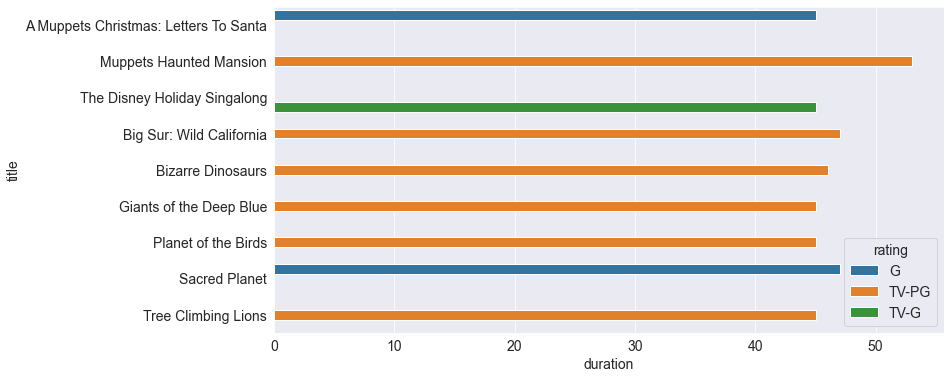

In [86]:
# We recommend the 9 movies for the school which are shortlisted as per their given criteria
plt.figure(figsize=(12, 6))
sns.barplot(x='duration', y='title', hue='rating', data=movies_for_schools);

#### Q4: Find the top 10 countries with the most content on disney+

In [87]:
disney_raw_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom",2021-06-04,2009,PG-13,108 min,"Action-Adventure, Family, Science Fiction",Wolverine unites with legendary X-Men to fight...
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada",2021-04-02,2009,PG,106 min,"Action-Adventure, Comedy, Family",Larry Daley returns to rescue some old friends...
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States",2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States",2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,2020-04-01,2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [88]:
#creating a copy of dataframe to work on
disney_data = disney_raw_df.copy()

In [89]:
#we need to split the strings from country column to get country in seperate rows for the movies
#The split() method splits a string into a list.
# we have specified ','(comma) as a separator
disney_data['country'] = disney_data['country'].str.split(',')

In [90]:
# The explode() method converts each element of the specified column(s) into a row.
out2 = disney_data.explode('country')

In [91]:
out2.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...",United States,2020-12-18,2016,PG-13,107 min,"Biographical, Comedy, Drama","True story of Eddie Edwards, a British ski-jum..."
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",United Kingdom,2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",Germany,2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...",United States,2020-09-18,2003,PG-13,112 min,"Buddy, Comedy, Coming of Age",Despite the wishes of their traditional famili...
1449,s1450,Movie,Captain Sparky vs. The Flying Saucers,Mark Waring,Charlie Tahan,United States,2020-04-01,2012,TV-G,2 min,"Action-Adventure, Animals & Nature, Animation",View one of Sparky's favorite home movies.


In [92]:
#lets remove the whitespaces
out2['country'] = out2['country'].str.strip()

In [93]:
#lets drop the columns where data is unavailable
out2 = out2[(out2.country != 'Data unavailable')]

In [94]:
# Listing the top 10 countries with the most content on Disney+
country_count  = out2['country'].value_counts()
country_count = country_count[:10,]

In [95]:
country_count

United States     1182
United Kingdom     101
Canada              76
Australia           23
France              22
South Korea         13
China               10
Japan               10
Germany              9
Ireland              8
Name: country, dtype: int64

In [96]:
#creating a dictionary which will used further to create the dataframe
country_count_predf= {'Country':['United States','United Kingdom','Canada','Australia','France','Sounth Korea','China','Japan','Germany','Ireland']
                  ,'No. of content':[1182,101,76,23,22,13,10,10,9,8]}

In [97]:
#creating a dataframe
country_count_df = pd.DataFrame(data=country_count_predf)

In [98]:
#dataframe is useful for plotting graphs in a easier way. The data was very less hence created dataframe manually
country_count_df

,Country,No. of content
0,United States,1182
1,United Kingdom,101
2,Canada,76
3,Australia,23
4,France,22
5,Sounth Korea,13
6,China,10
7,Japan,10
8,Germany,9
9,Ireland,8


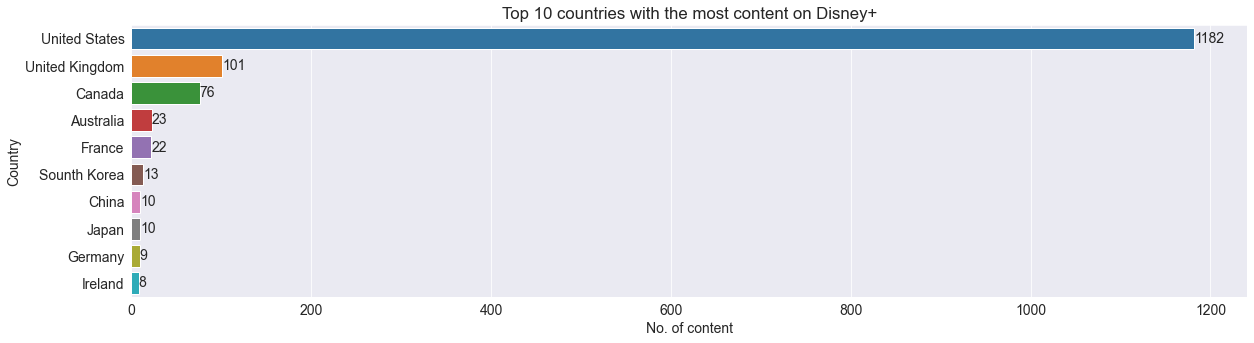

In [99]:
#plotting the top 10 countries with the most content on disney+
plt.figure(figsize=(20,5))
plt.title('Top 10 countries with the most content on Disney+')
ax = sns.barplot(y='Country', x='No. of content', data=country_count_df)
ax.bar_label(ax.containers[0]);

In [100]:
#United States has the maximum content on disney+

#### Q5: Is there any relation between the no. of seasons for the TV shows and the release_year? eg: Latest release year has more or less shows comparatively?

In [101]:
tv_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,Data unavailable,"John Lennon, Paul McCartney, George Harrison, ...",Data unavailable,2021-11-25,2021,PG-13,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,Data unavailable,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",Data unavailable,2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
7,s8,TV Show,Port Protection Alaska,Data unavailable,"Gary Muehlberger, Mary Miller, Curly Leach, Sa...",United States,2021-11-24,2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
8,s9,TV Show,Secrets of the Zoo: Tampa,Data unavailable,"Dr. Ray Ball, Dr. Lauren Smith, Chris Massaro,...",United States,2021-11-24,2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
13,s14,TV Show,"Dr. Oakley, Yukon Vet",Data unavailable,"Dr. Michelle Oakley, Zachary Fine",United States,2021-11-17,2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."


In [102]:
## Remove the 'Seasons' str from duration column, then convert to a number (Hint: str.replace() & astype() will be useful)
tv_shows_df['duration'] = tv_shows_df['duration'].str.replace('Seasons','')
tv_shows_df['duration'] = tv_shows_df['duration'].str.replace('Season','')

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/1227376287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration'] = tv_shows_df['duration'].str.replace('Seasons','')
C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/1227376287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration'] = tv_shows_df['duration'].str.replace('Season','')


In [103]:
tv_shows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4,s5,TV Show,The Beatles: Get Back,Data unavailable,"John Lennon, Paul McCartney, George Harrison, ...",Data unavailable,2021-11-25,2021,PG-13,1,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
6,s7,TV Show,Hawkeye,Data unavailable,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",Data unavailable,2021-11-24,2021,TV-14,1,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...


In [104]:
tv_shows_df['duration'] = tv_shows_df['duration'].astype(float)

C:\Users\PURVAR~1\AppData\Local\Temp/ipykernel_12588/3799998118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration'] = tv_shows_df['duration'].astype(float)


In [105]:
tv_shows_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 4 to 1434
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       395 non-null    object        
 1   type          395 non-null    object        
 2   title         395 non-null    object        
 3   director      395 non-null    object        
 4   cast          395 non-null    object        
 5   country       395 non-null    object        
 6   date_added    395 non-null    datetime64[ns]
 7   release_year  395 non-null    int64         
 8   rating        395 non-null    object        
 9   duration      395 non-null    float64       
 10  listed_in     395 non-null    object        
 11  description   395 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 40.1+ KB


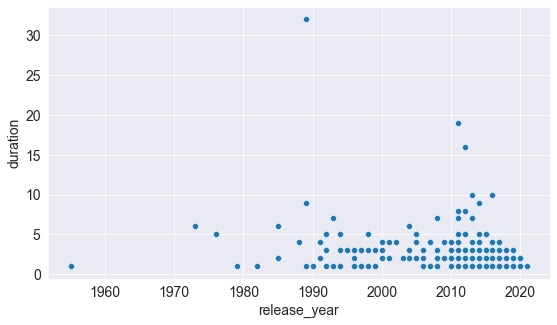

In [106]:
#check relationship between duration and release_year
sns.scatterplot(x=tv_shows_df.release_year, y=tv_shows_df.duration);

In [107]:
#There doesn't seem to be correlation between the the duration of the saesons and the release_year
#It is observed that majority of the shows have seasons less than 5
#It is interesting to observed one datapoint which has more than 30 seasons. 
#Lets find which show is it.

In [108]:
tv_shows_df.sort_values(by='duration',ascending=False).head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
92,s93,TV Show,The Simpsons,Data unavailable,"Dan Castellaneta, Julie Kavner, Nancy Cartwrig...",United States,2021-09-29,1989,TV-PG,32.0,"Animation, Comedy","The world’s favorite nuclear family, in the aw..."


In [109]:
#The Simpsons TV show released in year 1989 has 32 seasons.

Let us save and upload our work to Jovian before continuing.

In [110]:
import jovian

In [111]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'

## Inferences and Conclusion
- In our dataset of disney+ the earliest release year is 1928 and the latest is 2021.
- Most the content on the disney+ ott is after release year 2000.
- Movies are from year 1940 and above whereas TV shows are from year 1980 and further.
- There is no correlation between the release year and the duration of the movies or TV shows.
- Between years 1950 to 1985 movies were of longer duration.
- The data that we worked on had content added from OCT 2019 to NOV 2021.
- Year 2021 has the maximum content of 125 out of which 70 were movies and 55 TV Shows.
- Maximum movies uploaded are 1 to 2 hours long followed by short duration movies of less than 30 mins which are less than half of the normal duration movies uploaded. 30 to 60 mins and more than 120 minutes seems like a bit odd for the movie duration so these movies are less.
- United States country has the maximum content on disney+ followed by other countries like UNited Kingdom, Canada etc.
- It is observed that majority of the TV shows have seasons less than 5.
- 'The Simpsons' TV show released in year 1989 has 32 seasons.

In [112]:
import jovian

In [113]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'

## References and Future Work

#### Future Work
Take a look at the popular directors and actors from different countries worked on Movies or TV Shows
Find top genre Disney+ focuses on

#### References
- https://stackoverflow.com/
- https://flexiple.com/python
- https://www.geeksforgeeks.org/pandas
- https://www.analyticsvidhya.com/blog/2021/07/visualizing-netflix-data-using-python/
- https://www.kaggle.com/code/tejainece/seaborn-barplot-and-pandas-value-counts/notebook
- https://www.kaggle.com/code/tejainece/seaborn-barplot-and-pandas-value-counts/notebook
- https://www.dataquest.io/blog/comical-data-visualization-in-python-using-matplotlib/
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [114]:
import jovian

In [115]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "purva-raut/disney-plus-movies-and-tv-shows" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows


'https://jovian.ai/purva-raut/disney-plus-movies-and-tv-shows'